# Stakeholder
Realestate agency looking to see establish what properties to 

In [1]:
%pprint

Pretty printing has been turned OFF


In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("data_selected.csv")

### Time to remove outliers

# can we make data cleaning a function?
def data_clean(col_name, df2):
    Q1 = df2[col_name].quantile(.25)
    Q3 = df2[col_name].quantile(.75)
    IQR = Q3 - Q1
    out_top = Q3 + IQR
    out_bottom = Q1 - IQR
    df2 = df2[df2[col_name] <= out_top]
    df2 = df2[df2[col_name] >= out_bottom]
    return df2

In [6]:
df2 = data_clean("bedrooms", df)

In [7]:
df2.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df2.drop("lat", axis = 1, inplace = True)
df2.drop("long", axis = 1, inplace = True)
df2.drop("sqft_above", axis = 1, inplace = True)

In [9]:
#copied in data set about which city each zipcode belongs to
#zipcodes = pd.read_clipboard()
#zipcodes.to_csv("zipcodes.csv")
zipcodes = pd.read_csv("zipcodes.csv")

In [10]:
zipcodes['Population'] = zipcodes['Population'].str.replace(",","")

In [11]:
zipcodes['Population'] = zipcodes['Population'].astype(int)

In [12]:
zipcodes['ZIP Code'] = zipcodes['ZIP Code'].str[-6:].astype(int)

In [13]:
zipcodes.drop("Classification", axis = 1, inplace = True)
zipcodes.drop("Timezone", axis = 1, inplace = True)
zipcodes.drop("Area Code(s)", axis = 1, inplace = True)

In [14]:
zipcodes.rename(columns={"ZIP Code": "zipcode"}, inplace = True)

In [15]:
#mergeing into main dataframe
df3 = df2.merge(zipcodes, on='zipcode', how='left')

In [16]:
df3.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
#df3 = data_clean("price", df3)
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,cond_num,grade_num,view_num,City,Population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,1340,5650,2.0,4.0,0.0,Seattle,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,1690,7639,2.0,4.0,0.0,Seattle,37081
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,2720,8062,2.0,3.0,0.0,Kenmore,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,1360,5000,4.0,4.0,0.0,Seattle,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,1800,7503,2.0,5.0,0.0,Sammamish,25748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20506,6669080120,2014-12-15,405000.0,4,2.50,1980,5020,2.0,NO,NONE,...,2007,0.0,98056,1980,5064,2.0,5.0,0.0,Renton,32489
20507,9211010300,2014-07-07,509900.0,3,2.50,3030,9053,2.0,NO,NONE,...,2009,0.0,98059,3010,6026,2.0,5.0,0.0,Renton,34463
20508,3277800823,2014-08-20,327000.0,2,2.00,1490,1627,2.0,NO,NONE,...,2009,0.0,98126,1400,1498,2.0,4.0,0.0,Seattle,20698
20509,8835770330,2014-08-19,1060000.0,2,1.50,2370,184231,2.0,NO,NONE,...,2005,0.0,98045,3860,151081,2.0,5.0,0.0,North Bend,13888


In [55]:
from copy import deepcopy
#Branching point df4 is now null however
df5 = deepcopy(df3)

In [19]:
df5['bed/bath'] = df5['bedrooms']/df5['bathrooms']

In [20]:
df5['water_bool'] = df5['waterfront'].str.replace("NO", "0")
df5['water_bool'] = df5['water_bool'].str.replace("YES", "1")
#df5.dropna(subset = ['water_bool'], inplace = True)

In [21]:
df5['water_bool'] = df5['water_bool'].astype(int)

In [22]:
df6 = df5.drop(['waterfront', 'view', 'condition', 'grade', 'id', 'date'], axis = 1)

In [23]:
#df6 = df5.drop(columns = ['bath/bed','waterbool','id', 'date', 'waterfront', 'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'Unnamed: 0'])

In [24]:
df6 = df6.dropna(subset = ['yr_renovated'])

In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15025 entries, 1 to 20510
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15025 non-null  float64
 1   bedrooms       15025 non-null  int64  
 2   bathrooms      15025 non-null  float64
 3   sqft_living    15025 non-null  int64  
 4   sqft_lot       15025 non-null  int64  
 5   floors         15025 non-null  float64
 6   sqft_basement  15025 non-null  float64
 7   yr_built       15025 non-null  int64  
 8   yr_renovated   15025 non-null  float64
 9   zipcode        15025 non-null  int64  
 10  sqft_living15  15025 non-null  int64  
 11  sqft_lot15     15025 non-null  int64  
 12  cond_num       15025 non-null  float64
 13  grade_num      15025 non-null  float64
 14  view_num       15025 non-null  float64
 15  City           15025 non-null  object 
 16  Population     15025 non-null  int32  
 17  bed/bath       15025 non-null  float64
 18  water_

In [26]:
df6['grade_num'] = np.where(df6['grade_num'] == 0.0, 1.0, df6['grade_num'])
#only 1 value was at 0.0 had to replace for future processing

In [27]:
df6_list = list(df6.columns)

In [28]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15025 entries, 1 to 20510
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15025 non-null  float64
 1   bedrooms       15025 non-null  int64  
 2   bathrooms      15025 non-null  float64
 3   sqft_living    15025 non-null  int64  
 4   sqft_lot       15025 non-null  int64  
 5   floors         15025 non-null  float64
 6   sqft_basement  15025 non-null  float64
 7   yr_built       15025 non-null  int64  
 8   yr_renovated   15025 non-null  float64
 9   zipcode        15025 non-null  int64  
 10  sqft_living15  15025 non-null  int64  
 11  sqft_lot15     15025 non-null  int64  
 12  cond_num       15025 non-null  float64
 13  grade_num      15025 non-null  float64
 14  view_num       15025 non-null  float64
 15  City           15025 non-null  object 
 16  Population     15025 non-null  int32  
 17  bed/bath       15025 non-null  float64
 18  water_

In [57]:
df6.View.value_counts()

AttributeError: 'DataFrame' object has no attribute 'View'

In [29]:
X = df6[df6_list].drop(columns=['price', 'City', 'view_num', 'cond_num', 'sqft_lot'])
y = df6['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1684.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:37:05   Log-Likelihood:            -2.0638e+05
No. Observations:               15025   AIC:                         4.128e+05
Df Residuals:                   15010   BIC:                         4.129e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.148e+06   3.84e+06     -0.560      0.576   -9.67e+06    5.37e+06
bedrooms      -1.275e+05   4691.186    -27.169      0.000   -1.37e+05   -1.18e+05
bathrooms      1.749e+05   7909.142     22.108      0.000    1.59e+05     1.9e+05
sqft_living     232.9038      4.612     50.505      0.000     223.865     241.943
floors         4.669e+04   4759.623      9.809      0.000    3.74e+04     5.6e+04
sqft_basement     4.3457      5.648      0.769      0.442      -6.724      15.416
yr_built      -3105.0709     87.281    -35.576      0.000   -3276.151   -2933.990
yr_renovated     15.7320      4.904      3.208      0.001       6.120      25.344
zipcode          81.0107     38.600      2.099      0.036       5.349     156.672
sqft_living15    94.4763      4.366     21.640      0.000      85.919     103.034
sqft_lot15       -0.7311      0.069    -10.604      0.000      -0.866      -0.596
grade_num      3920.7471   1565.551      2.504      0.012     852.077    6989.417
Population       -1.4569      0.169     -8.635      0.000      -1.788      -1.126
bed/bath       1.182e+05   7201.305     16.409      0.000    1.04e+05    1.32e+05
water_bool     7.331e+05    2.2e+04     33.324      0.000     6.9e+05    7.76e+05
==============================================================================
Omnibus:                     8346.732   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217242.220
Skew:                           2.160   Prob(JB):                         0.00
Kurtosis:                      21.120   Cond. No.                     2.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
lr = LinearRegression()

#col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       #'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'cond_num',
       #'grade_num', 'view_num', 'Population', 'bed/bath',
       #'water_bool']
X = df6[df6_list].drop(columns=['price', 'City', 'view_num', 'cond_num', 'sqft_lot'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
print(lr.coef_)
print(X.columns)
print(lr.intercept_)
print(lr.score(X_train, y_train))

[-1.23632088e+05  1.67463753e+05  2.36219417e+02  4.94436059e+04
  2.88925321e+00 -3.04285415e+03  1.83434093e+01  8.64480363e+01
  8.95877134e+01 -6.96900721e-01  4.00053392e+03 -1.53370479e+00
  1.13858612e+05  8.37568134e+05]
Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15',
       'grade_num', 'Population', 'bed/bath', 'water_bool'],
      dtype='object')
-2793337.5533677037
0.6120146807093638


In [31]:
X = df6.drop(columns=['price', 'City', 'sqft_lot','yr_renovated','cond_num','grade_num','view_num'])
y = df6['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1961.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:37:05   Log-Likelihood:            -2.0639e+05
No. Observations:               15025   AIC:                         4.128e+05
Df Residuals:                   15012   BIC:                         4.129e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.868e+06   3.84e+06     -0.487      0.626   -9.39e+06    5.65e+06
bedrooms      -1.275e+05   4693.440    -27.159      0.000   -1.37e+05   -1.18e+05
bathrooms       1.76e+05   7904.851     22.259      0.000     1.6e+05    1.91e+05
sqft_living     233.2106      4.613     50.558      0.000     224.169     242.252
floors         4.773e+04   4754.577     10.039      0.000    3.84e+04    5.71e+04
sqft_basement     4.1665      5.649      0.738      0.461      -6.907      15.240
yr_built      -3172.2854     83.843    -37.836      0.000   -3336.627   -3007.944
zipcode          79.6971     38.605      2.064      0.039       4.027     155.367
sqft_living15    93.8376      4.365     21.500      0.000      85.282     102.393
sqft_lot15       -0.7306      0.069    -10.591      0.000      -0.866      -0.595
Population       -1.4739      0.169     -8.735      0.000      -1.805      -1.143
bed/bath       1.174e+05   7201.563     16.302      0.000    1.03e+05    1.32e+05
water_bool     7.387e+05    2.2e+04     33.647      0.000    6.96e+05    7.82e+05
==============================================================================
Omnibus:                     8371.932   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218904.311
Skew:                           2.168   Prob(JB):                         0.00
Kurtosis:                      21.189   Cond. No.                     2.18e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Without outliers. r2 increases pre zip and decreases post zip

# The end

DO NOT USE df_numeric OR df4 BEFORE THIS

## attempted to clean and messed up. replace df6 with df3 or df4 where appropriate

In [32]:
#df4 = df3
#df4 = df3.dropna(subset = ['yr_renovated', 'waterfront'])

In [33]:
X_zipcode = pd.get_dummies(df6['zipcode'], drop_first = True)
X_zipcode

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df6 = pd.concat([df6, X_zipcode], axis = 1)

In [35]:
#df_numeric = df4.drop(columns=['id','date', 'waterfront', 'view', 'condition', 'grade', 'City', 'zipcode', 'Unnamed: 0', 'Population'])

In [36]:
#df_numeric['bath/bed'] = df_numeric['bathrooms']/df_numeric['bedrooms']
#df_numeric.head()

In [37]:
#sns.histplot(data = df_numeric, x = df_numeric['bath/bed'], y = df_numeric['price'])

In [38]:
df6.columns

Index([        'price',      'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors', 'sqft_basement',      'yr_built',
        'yr_renovated',       'zipcode', 'sqft_living15',    'sqft_lot15',
            'cond_num',     'grade_num',      'view_num',          'City',
          'Population',      'bed/bath',    'water_bool',           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,           98038,           98039,           98040,
                 98042,           98045,           98052,           98053,
                 98055,           98056,           98058,           98059,
                 98065,  

In [39]:
X = df6.drop(columns=['price', 'City', 'view_num', 'cond_num', 'sqft_lot', 'bedrooms', 'bathrooms'])
y = df6['price']

model_1 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     699.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:37:05   Log-Likelihood:            -2.0186e+05
No. Observations:               15025   AIC:                         4.039e+05
Df Residuals:                   14945   BIC:                         4.045e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.021e+04    500.663    -20.398      0.000   -1.12e+04   -9231.345
sqft_living     243.1657      2.998     81.121      0.000     237.290     249.041
floors        -4.135e+04   3871.210    -10.682      0.000   -4.89e+04   -3.38e+04
sqft_basement   -87.1161      4.370    -19.934      0.000     -95.682     -78.550
yr_built       -318.3051     72.420     -4.395      0.000    -460.258    -176.352
yr_renovated     17.3678      3.657      4.749      0.000      10.199      24.537
zipcode           7.8388      1.448      5.413      0.000       5.000      10.677
sqft_living15    51.4289      3.448     14.914      0.000      44.669      58.188
sqft_lot15        0.2674      0.055      4.837      0.000       0.159       0.376
grade_num      1398.8432   1164.349      1.201      0.230    -883.424    3681.111
Population       -9.6600      0.381    -25.335      0.000     -10.407      -8.913
bed/bath      -1.705e+04   2607.762     -6.538      0.000   -2.22e+04   -1.19e+04
water_bool     8.939e+05   1.66e+04     53.789      0.000    8.61e+05    9.26e+05
98002          3.433e+04   1.75e+04      1.957      0.050     -62.800    6.87e+04
98003          1.267e+05   1.87e+04      6.784      0.000    9.01e+04    1.63e+05
98004          7.601e+05   1.46e+04     51.898      0.000    7.31e+05    7.89e+05
98005           1.85e+05   1.59e+04     11.657      0.000    1.54e+05    2.16e+05
98006          3.596e+05   1.53e+04     23.489      0.000     3.3e+05     3.9e+05
98007          1.965e+05    1.9e+04     10.367      0.000    1.59e+05    2.34e+05
98008          1.999e+05   1.41e+04     14.157      0.000    1.72e+05    2.28e+05
98010         -2.025e+05   1.95e+04    -10.408      0.000   -2.41e+05   -1.64e+05
98011          8.328e+04   1.73e+04      4.821      0.000    4.94e+04    1.17e+05
98014         -1.536e+05   1.75e+04     -8.794      0.000   -1.88e+05   -1.19e+05
98019         -1.581e+05   1.53e+04    -10.317      0.000   -1.88e+05   -1.28e+05
98022         -8.081e+04   1.48e+04     -5.470      0.000    -1.1e+05   -5.19e+04
98023           1.33e+05   1.83e+04      7.274      0.000    9.72e+04    1.69e+05
98024         -1.097e+05    2.1e+04     -5.216      0.000   -1.51e+05   -6.85e+04
98027          1.169e+05   1.32e+04      8.883      0.000    9.11e+04    1.43e+05
98028          1.215e+04   1.34e+04      0.906      0.365   -1.41e+04    3.84e+04
98029          1.567e+05   1.35e+04     11.604      0.000     1.3e+05    1.83e+05
98030            1.5e+04   1.68e+04      0.895      0.371   -1.78e+04    4.78e+04
98031          6.433e+04    1.7e+04      3.779      0.000     3.1e+04    9.77e+04
98032          4.509e+04   2.03e+04      2.223      0.026    5338.902    8.48e+04
98033          4.131e+05   1.49e+04     27.774      0.000    3.84e+05    4.42e+05
98034          3.062e+05    1.6e+04     19.160   

In [40]:
#list(df_numeric.columns)

In [41]:
list(df6.columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 'grade_num', 'view_num', 'City', 'Population', 'bed/bath', 'water_bool', 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]

In [42]:
zip_list = [98002, 98003, 98004, 98005, 98006, 
            98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 
            98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 
            98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 
            98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 
            98178, 98188, 98198, 98199,]

In [43]:
lr = LinearRegression()

col_selector = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 
                'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'cond_num', 
                'grade_num', 'view_num', 'Population', 'bed/bath', 'water_bool', 98002, 98003, 
                98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 
                98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 
                98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 
                98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 
                98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 
                98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 
                98199]
X = df6[col_selector]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(X_train, y_train)
#print(lr.coef_)
#print(X.columns)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

1566057259901.0703
0.7942485111471511
0.8090645155270751


In [44]:
coefs = lr.coef_

list(zip(coefs,col_selector))

[(-89363.3001499863, 'bedrooms'), (123533.84260899256, 'bathrooms'), (235.95066337077583, 'sqft_living'), (0.23234892876546098, 'sqft_lot'), (-42317.971039664015, 'floors'), (-71.58517453614485, 'sqft_basement'), (-376.605231502768, 'yr_built'), (13.411432401270304, 'yr_renovated'), (-15966126.694045378, 'zipcode'), (59.68951078038663, 'sqft_living15'), (-0.07766322541283444, 'sqft_lot15'), (1231.57611660154, 'cond_num'), (1409.9121869532974, 'grade_num'), (353.1381444027711, 'view_num'), (-42633.433266435546, 'Population'), (98807.8724168106, 'bed/bath'), (857916.758126585, 'water_bool'), (4739926.206060312, 98002), (553766787.761106, 98003), (-120383683.85020496, 98004), (-541081793.8935231, 98005), (269984722.9138968, 98006), (-203299898.73780757, 98007), (-207709947.62407494, 98008), (-1002491727.817764, 98010), (44707979.771627, 98011), (-864425838.2664961, 98014), (-615798557.2885484, 98019), (-130425061.21243234, 98022), (1016272895.9385167, 98023), (-752239062.7616425, 98024), 

In [45]:
y_pred = lr.predict(X_test)

In [46]:
y_pred[0:10]

array([ 725754.26220703,  638642.22216797,  160583.70678711,
        511096.55712891,  558016.0612793 ,  127625.30981445,
        351789.92602539,  469939.53662109, 1357662.57470703,
        932190.08740234])

In [47]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

96755.71494863703

In [48]:
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
RMSE

154542.90605050934

The effect of filtering out the price outliers is as follows

Filtered out: our model tends to over value homes

filtered in: our model tends to under value homes

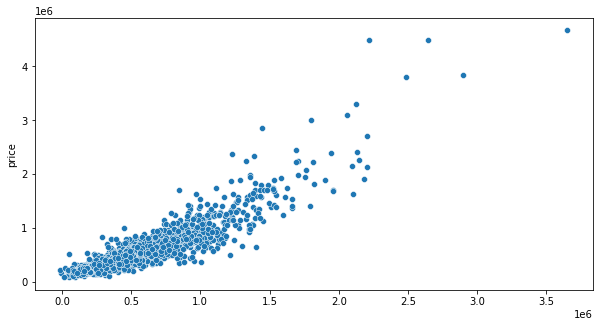

In [49]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = y_pred, y= y_test)
plt.show()

In [50]:
#col_selector2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 
                #'sqft_living15', 'cond_num', 'grade_num', 'view_num', 98002, 98003, 98004, 98005, 98006, 
                #98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 
                #98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 
                #98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 
                #98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 
                #98178, 98188, 98198, 98199, 'bed/bath', 'bath/bed']
#X = df6[col_selector2]
#y = df6['price']

#model_3 = sm.OLS(endog = y, exog=sm.add_constant(X)).fit()
#model_3.summary()

In [51]:
df6['Population'].describe()

count    15025.000000
mean     30670.086323
std      11138.950456
min       2971.000000
25%      21904.000000
50%      31365.000000
75%      39816.000000
max      58442.000000
Name: Population, dtype: float64

In [52]:
df6.groupby(by = ['zipcode'])['Population'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,245.0,31911.0,0.0,31911.0,31911.0,31911.0,31911.0,31911.0
98002,140.0,31647.0,0.0,31647.0,31647.0,31647.0,31647.0,31647.0
98003,212.0,44151.0,0.0,44151.0,44151.0,44151.0,44151.0,44151.0
98004,222.0,27946.0,0.0,27946.0,27946.0,27946.0,27946.0,27946.0
98005,126.0,17714.0,0.0,17714.0,17714.0,17714.0,17714.0,17714.0
...,...,...,...,...,...,...,...,...
98177,179.0,19030.0,0.0,19030.0,19030.0,19030.0,19030.0,19030.0
98178,183.0,24092.0,0.0,24092.0,24092.0,24092.0,24092.0,24092.0
98188,91.0,23111.0,0.0,23111.0,23111.0,23111.0,23111.0,23111.0


In [53]:
df6.groupby(['City', 'zipcode'])['Population'].sum()

City         zipcode
Auburn       98001      7818195
             98002      4430580
             98092      9993816
Bellevue     98004      6204012
             98005      2231964
                         ...   
Seattle      98199      4173432
Snoqualmie   98065      2730285
Vashon       98070       924288
Woodinville  98072      4373152
             98077      2078505
Name: Population, Length: 70, dtype: int32

In [54]:
df4

NameError: name 'df4' is not defined

In [ ]:
df6

In [ ]:
df_pop = df6

In [ ]:
#number of zipcodes
len(list(df_pop['zipcode'].unique()))

In [ ]:
#number of cities
len(list(df_pop['City'].unique()))

In [ ]:
len(list(df_pop['Population'].unique()))

In [ ]:
pop_dict = dict(df_pop.groupby(['City', 'zipcode'])['Population'].unique())

In [ ]:
pop_dict

In [ ]:
for (x,y) in pop_dict:
    print(x)

In [ ]:
for key,value in pop_dict:
    print(:value)

In [ ]:
dic = pop_dict
better_dictionary = {}

# (one time) init better dict: O(n) -- with n being the number of tuples
for k, v in dic.items():
    for i in k:
        if i in better_dictionary:
            better_dictionary[i].append(v)
        else:
            better_dictionary[i] = [v]

my_list = better_dictionary["Seattle"] # get values: O(1)
print(my_list)

In [ ]:
sum(my_list)